In [16]:
%load_ext autoreload
%autoreload 2
from modules import read_and_write
from modules import polyakov
from modules import utility
from modules import fourier_surface
import pandas as pd
import os
import glob


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


For reference with integration method the following surface tensions were computed

$z_1$: $\alpha_{o-o} / T^3(\beta=10.85) = 1.2316804724774406$

$z_2$: $\alpha_{o-o} / T^3(\beta=10.85) = 1.5433288477348852$

# Load data

In [40]:
folder_names = ["../data/output-measure-surface/su4-36-36-48-6",
                "../data/output-measure-surface/su4-44-44-64-6/beta-12-twist-2",
                "../data/output-measure-surface/su4-44-44-64-6/beta-10.9-twist-2",
                "../data/output-measure-surface/su4-44-44-64-6/beta-10.85-twist-1",
                "../data/output-measure-surface/su4-44-44-64-6/beta-10.85-twist-2"]
choose_folder = 4
fourier_profiles = {}
folder = folder_names[choose_folder-1]
files = glob.glob(os.path.join(folder, "fourier_profile_*"))
for file in files:
    file_name = file.split("/")[-1]
    smearing_level = file_name.split("_")[-1]
    volume, fourier_profile = read_and_write.read_surface_data(folder, file_name)
    fourier_profiles[smearing_level] = fourier_profile
fourier_profiles = dict(sorted(fourier_profiles.items(), key=lambda item: int(item[0])))
    

In [41]:
utility.display_markdown_title(folder)

# $\text{SU}(4)$, $V$ = ['44', '44', '64', '6'], $\beta=$ 10.85, twist coeff $=$ 1

## Perform post processing

In [42]:
n_2_list = []
f_n_list = []
errors_list = []
for smearing_level, profile in fourier_profiles.items():
    n_2, f_n, errors = utility.compute_with_aa_jackknife_fourier(profile, 10, thermalization=100)
    n_2_list.append(n_2)
    f_n_list.append(f_n)
    errors_list.append(errors)


## Plot Fourier modes for different smearing steps

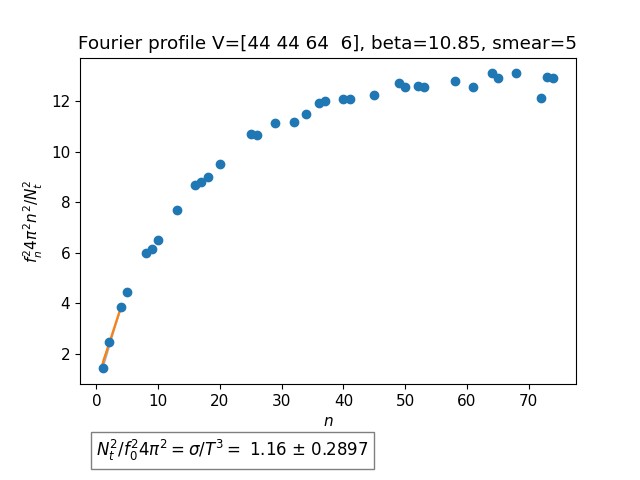

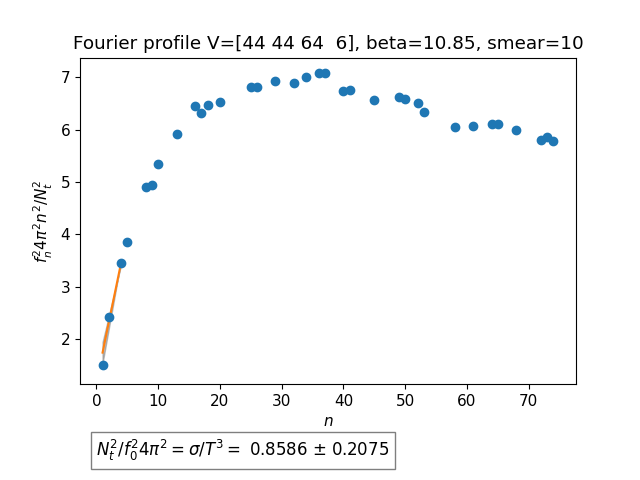

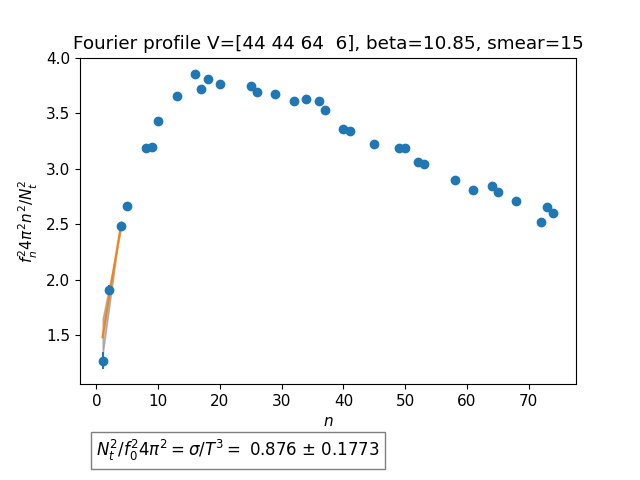

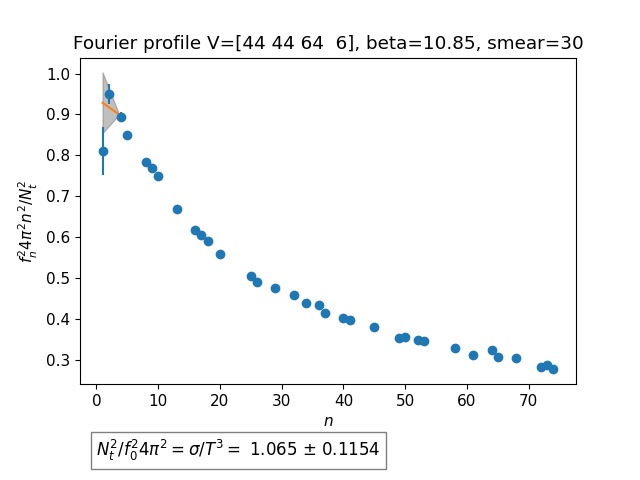

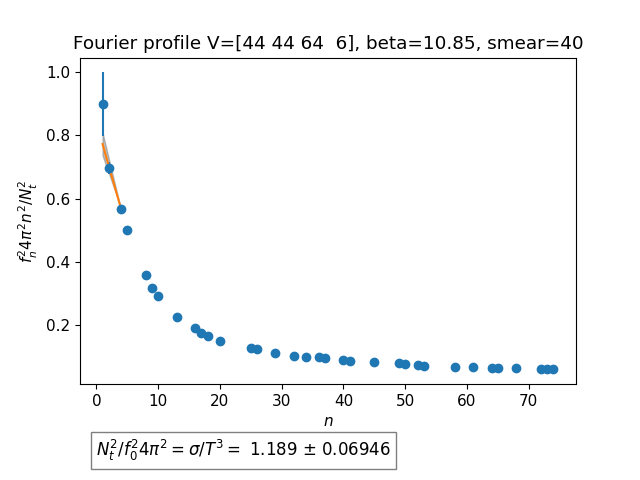

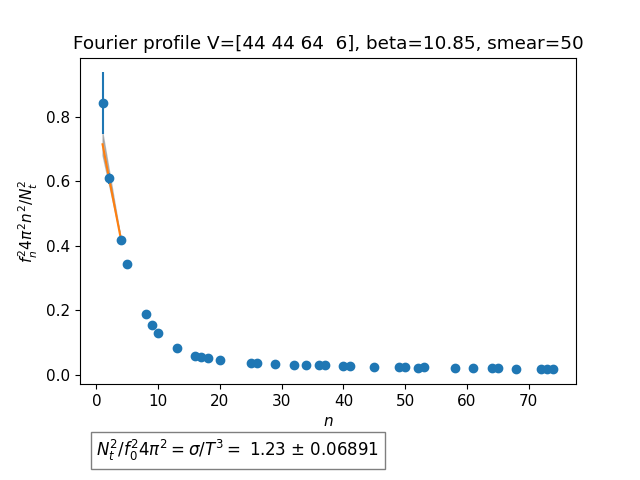

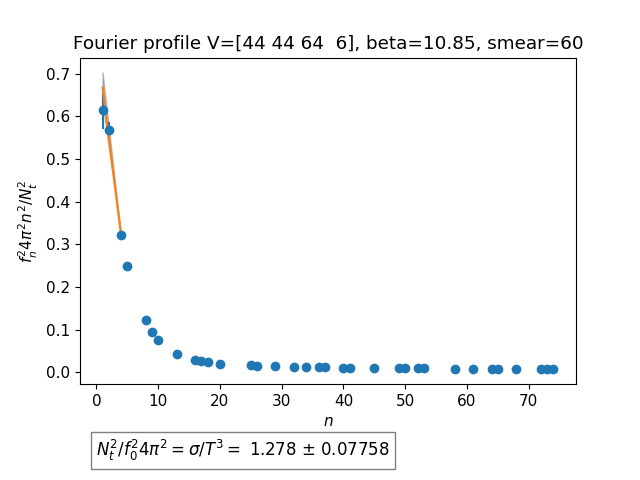

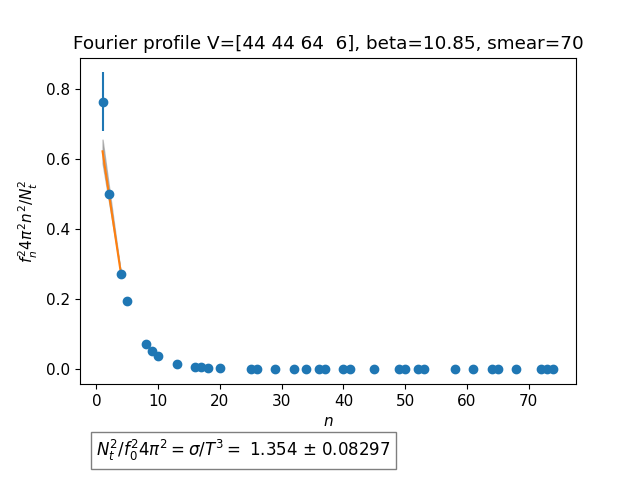

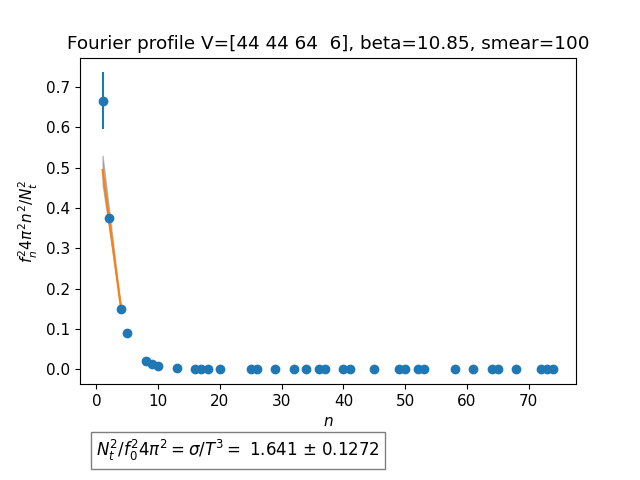

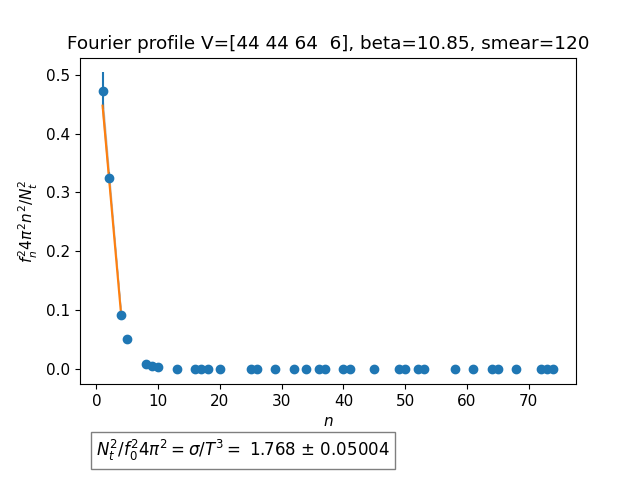

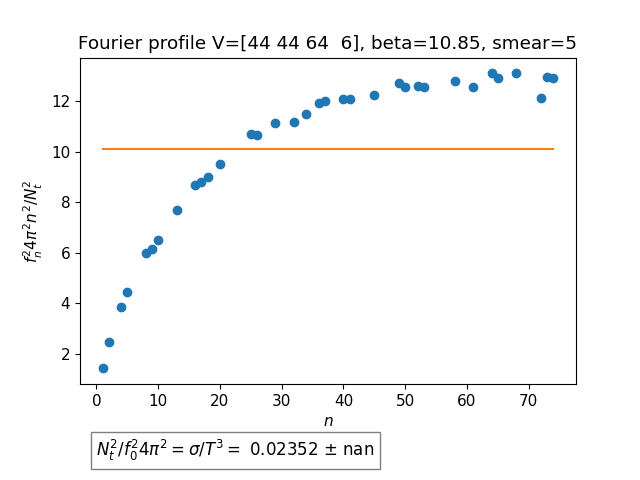

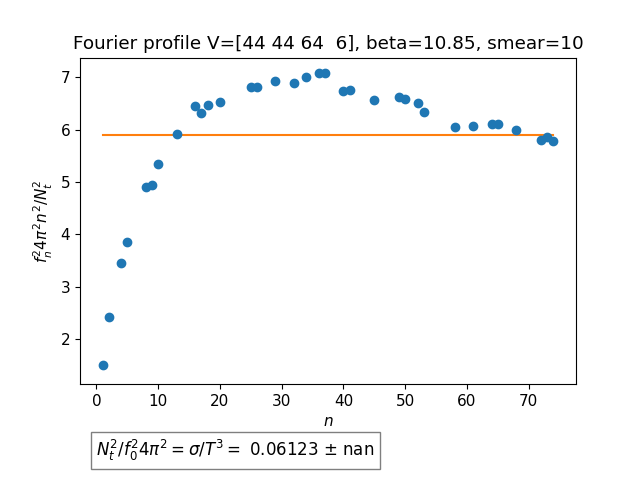

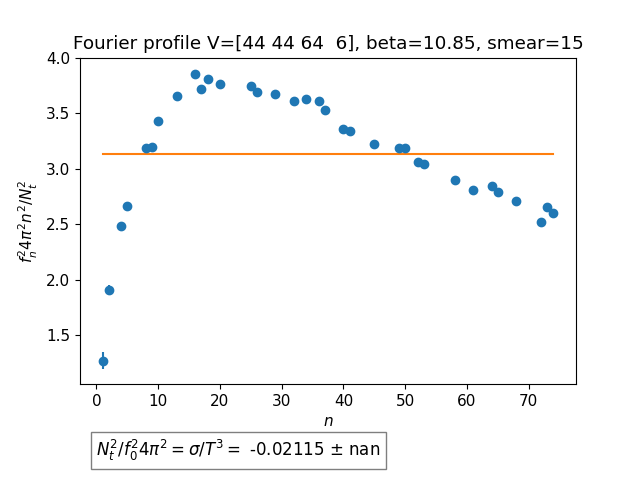

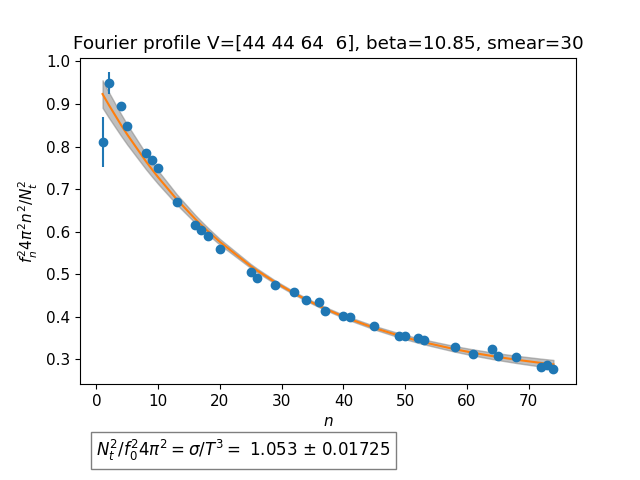

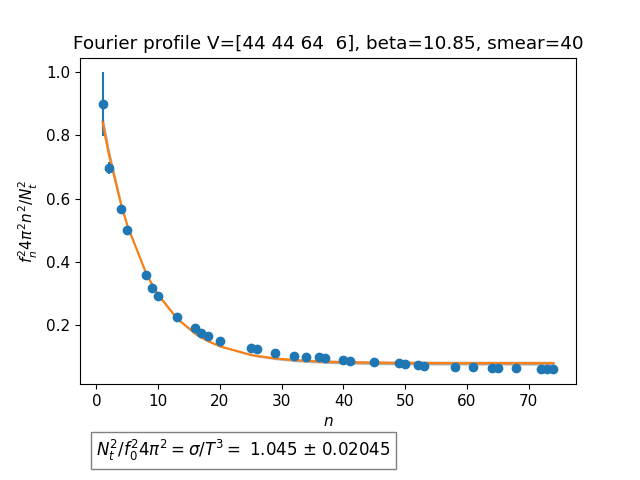

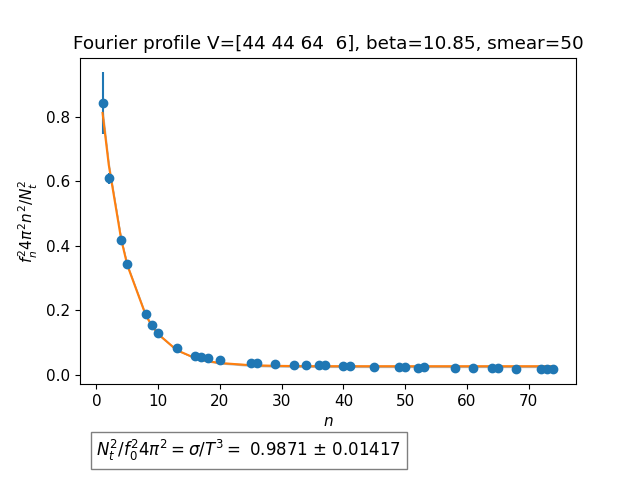

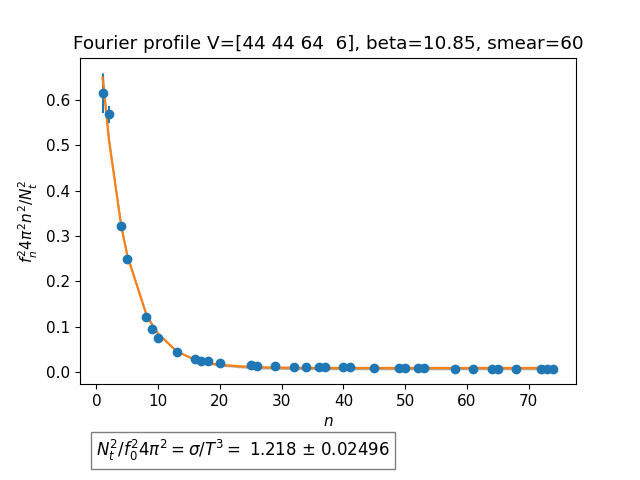

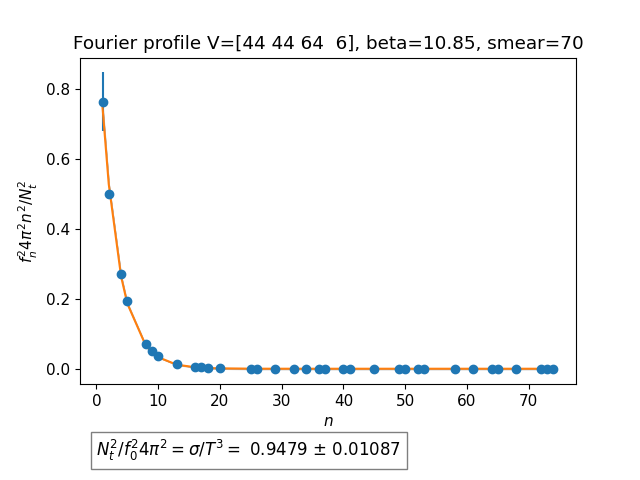

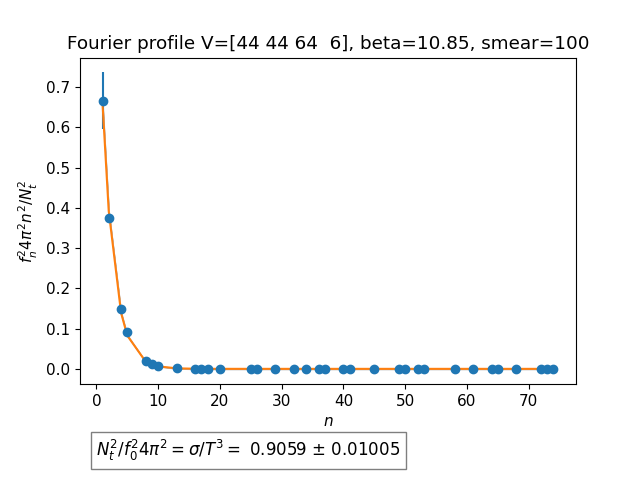

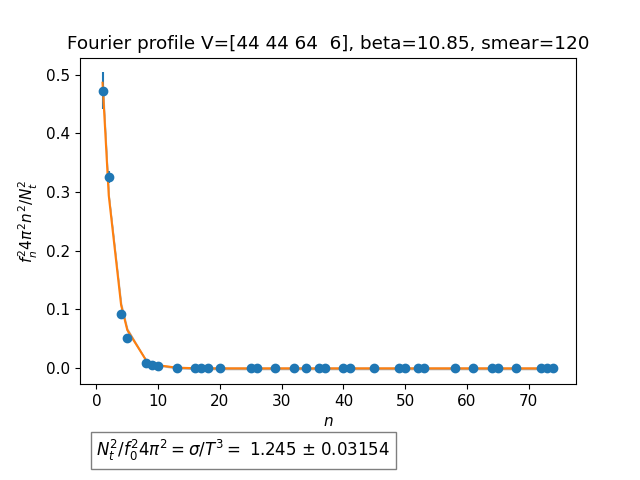

|   smearing | linear                              | exponential                          |
|-----------:|:------------------------------------|:-------------------------------------|
|          5 | $\sigma / T^3=$ 1.16 $\pm$ 0.2897   | $\sigma / T^3=$ 0.02352 $\pm$ nan    |
|         10 | $\sigma / T^3=$ 0.8586 $\pm$ 0.2075 | $\sigma / T^3=$ 0.06123 $\pm$ nan    |
|         15 | $\sigma / T^3=$ 0.876 $\pm$ 0.1773  | $\sigma / T^3=$ -0.02115 $\pm$ nan   |
|         30 | $\sigma / T^3=$ 1.065 $\pm$ 0.1154  | $\sigma / T^3=$ 1.053 $\pm$ 0.01725  |
|         40 | $\sigma / T^3=$ 1.189 $\pm$ 0.06946 | $\sigma / T^3=$ 1.045 $\pm$ 0.02045  |
|         50 | $\sigma / T^3=$ 1.23 $\pm$ 0.06891  | $\sigma / T^3=$ 0.9871 $\pm$ 0.01417 |
|         60 | $\sigma / T^3=$ 1.278 $\pm$ 0.07758 | $\sigma / T^3=$ 1.218 $\pm$ 0.02496  |
|         70 | $\sigma / T^3=$ 1.354 $\pm$ 0.08297 | $\sigma / T^3=$ 0.9479 $\pm$ 0.01087 |
|        100 | $\sigma / T^3=$ 1.641 $\pm$ 0.1272  | $\sigma / T^3=$ 0.9059 $\pm$ 0.01005 |
|        120 | $\sigma / T^3=$ 1.768 $\pm$ 0.05004 | $\sigma / T^3=$ 1.245 $\pm$ 0.03154  |

TypeError: Could not convert string '$\sigma / T^3=$ 1.16 $\pm$ 0.2897$\sigma / T^3=$ 0.8586 $\pm$ 0.2075$\sigma / T^3=$ 0.876 $\pm$ 0.1773$\sigma / T^3=$ 1.065 $\pm$ 0.1154$\sigma / T^3=$ 1.189 $\pm$ 0.06946$\sigma / T^3=$ 1.23 $\pm$ 0.06891$\sigma / T^3=$ 1.278 $\pm$ 0.07758$\sigma / T^3=$ 1.354 $\pm$ 0.08297$\sigma / T^3=$ 1.641 $\pm$ 0.1272$\sigma / T^3=$ 1.768 $\pm$ 0.05004' to numeric

In [58]:
%matplotlib widget
smearing_levels = list(fourier_profiles.keys())
show_plot = True
data = {
    "smearing": smearing_levels,
    "linear": [
        fourier_surface.compute_fourier_profile(
            n_2, f_n, volume, errors=error, beta=10.85, fit_range=3, smearing=smear, show_plot=show_plot
        ) for n_2, f_n, error, smear in zip(n_2_list, f_n_list, errors_list, smearing_levels)
    ],
    "exponential": [
        fourier_surface.compute_fourier_profile_exponential_fit(
            n_2, f_n, volume, errors=error, beta=10.85, smearing=smear, show_plot=show_plot
        ) for n_2, f_n, error, smear in zip(n_2_list, f_n_list, errors_list, smearing_levels)
    ]
}

df = pd.DataFrame(data)
utility.print_df_as_markdown_fourier_modes(df)
print("Linear fit mean:", df["linear"].mean())
print("Exponential fit mean: ", df["exponential"].mean())

In [45]:
import matplotlib.pyplot as plt

plt.close('all')